<a href="https://colab.research.google.com/github/Varogell/machine-learning-ti3f/blob/main/kuis2_Alvaro_Hegel_Ivanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library yang dibutuhkan
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

#Load Dataset

Load MNIST

1.Pertama, dataset MNIST diimpor dari TensorFlow Keras menggunakan from tensorflow.keras.datasets import mnist.

In [2]:
# Import dataset
from tensorflow.keras.datasets import mnist

2.Kemudian, fungsi mnist.load_data() digunakan untuk memuat dataset MNIST. Dataset ini terdiri dari data latih (train_data) dan label latih (train_labels), serta data uji (test_data) dan label uji (test_labels). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji performa model.

In [3]:
# Load dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

3.Selanjutnya, train_labels.shape dan test_labels.shape digunakan untuk memeriksa ukuran label latih dan uji. Hasilnya adalah tuple yang menunjukkan jumlah sampel dalam setiap label.

In [4]:
# Memeriksa ukuran data train dan test
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Memeriksa ukuran label train dan test
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

4.Kemudian, train_data[0].shape digunakan untuk memeriksa ukuran data pertama (index ke-0) dalam data latih. Jika dataset MNIST diimpor dengan benar, maka ukuran data haruslah (28, 28) yang menunjukkan gambar berukuran 28x28 piksel

In [6]:
# Memeriksa ukuran data pertama index ke 0
train_data[0].shape

(28, 28)

5.Terakhir, train_labels.shape digunakan untuk memeriksa ukuran label latih. Hasilnya adalah tuple yang menunjukkan jumlah label dalam data latih

In [7]:
# Memeriksa ukuran label
train_labels.shape

(60000,)

#Combine Train and Test Data
1.Menggabungkan data latih dan data uji dari dataset MNIST menjadi satu array menggunakan np.vstack([train_data, test_data]). Hasilnya disimpan dalam variabel digits_data.

2.Menggabungkan label latih dan label uji dari dataset MNIST menjadi satu array menggunakan np.hstack([train_labels, test_labels]). Hasilnya disimpan dalam variabel digits_labels

In [8]:
digits_data = np.vstack([train_data, test_data])

digits_labels = np.hstack([train_labels, test_labels])

3.Memeriksa bentuk (shape) dari digits_data dan digits_labels menggunakan digits_data.shape dan digits_labels.shape. Ini dilakukan untuk memastikan bahwa penggabungan data dan label telah dilakukan dengan benar

In [9]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape

(70000,)

4.Memilih secara acak indeks (idx) dari digits_data untuk menampilkan gambar digit secara acak menggunakan np.random.randint(0, digits_data.shape[0]). Gambar tersebut ditampilkan menggunakan plt.imshow() dengan cmap='gray' untuk menggambarkan citra dalam skala abu-abu.
5.Menambahkan judul pada plot dengan plt.title() yang menunjukkan kelas (label) dari digit yang ditampilkan

Text(0.5, 1.0, 'Class: 4')

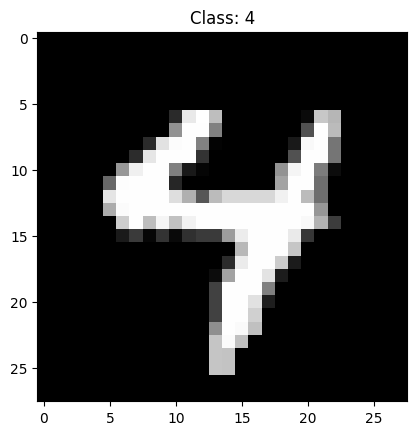

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])

plt.imshow(digits_data[idx], cmap='gray')

plt.title('Class: ' + str(digits_labels[idx]))

6.Terakhir, untuk melihat distribusi label dalam dataset, kode membuat DataFrame df_labels dari digits_labels dan menggunakan sns.countplot() untuk menghitung dan memvisualisasikan jumlah masing-masing label

<Axes: xlabel='Labels', ylabel='count'>

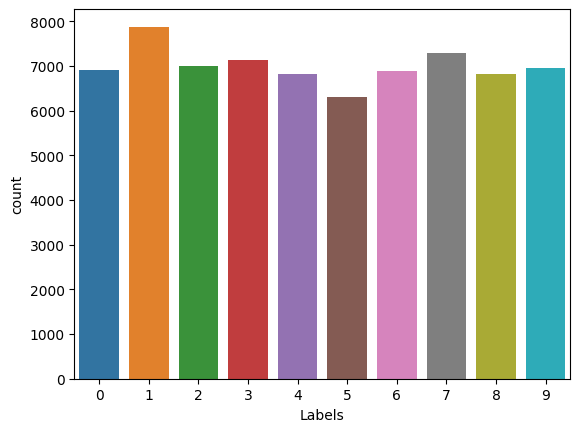

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])

sns.countplot(df_labels, x='Labels')

Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 11:39:29--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.1’

alfabeto_A-Z.zip.1  100%[===================>] 184.67M   166MB/s    in 1.1s    

2023-12-05 11:39:31 (166 MB/s) - ‘alfabeto_A-Z.zip.1’ saved [193643888/193643888]



In [14]:
# Extract zip file
# Inisialisasi objek ZipFile untuk file 'alfabeto_A-Z.zip' dengan mode membaca ('r')
zip_object = zipfile.ZipFile(file='alfabeto_A-Z.zip', mode='r')
# Ekstraksi semua isi file zip ke direktori saat ini ('./')
zip_object.extractall('./')
# Menutup file zip setelah proses ekstraksi selesai
zip_object.close()

1.Mengimpor modul pandas dan membaca file CSV "A_Z Handwritten Data.csv" sebagai DataFrame dataset_az. Tipe data dalam DataFrame diubah menjadi float32

In [15]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan DataFrame dataset_az
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2.Melakukan pemrosesan data:
-Menghapus kolom dengan label '0' dari dataset_az dan menyimpannya dalam variabel alphabet_data.
-Mengambil kolom dengan label '0' dari dataset_az dan menyimpannya dalam variabel alphabet_labels.

In [16]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)

# Get labels only
alphabet_labels = dataset_az['0']

3.Memeriksa bentuk (shape) dari alphabet_data dan alphabet_labels menggunakan print(alphabet_data.shape, alphabet_labels.shape)

In [17]:
# Check shape data
print(alphabet_data.shape, alphabet_labels.shape)

(372450, 784) (372450,)


In [18]:
# Check shape labels
alphabet_labels.shape

(372450,)

4.Mengubah bentuk array alphabet_data menjadi (alphabet_data.shape[0], 28, 28) menggunakan np.reshape().

5.Memeriksa bentuk (shape) dari alphabet_data setelah perubahan bentuk menggunakan alphabet_data.shape.

In [19]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

6.Memilih secara acak indeks (index) dari alphabet_data menggunakan np.random.randint(0, alphabet_data.shape[0]).

7.Menampilkan gambar dari alphabet_data dengan peta warna 'gray' menggunakan plt.imshow(). Judul plot juga ditambahkan dengan mencantumkan kelas dari alphabet_labels untuk sampel yang dipilih.

8.Membuat DataFrame baru df_az_labels dengan kolom 'Labels' yang berisi nilai-nilai dari alphabet_labels.

Text(0.5, 1.0, 'Class: 0.0')

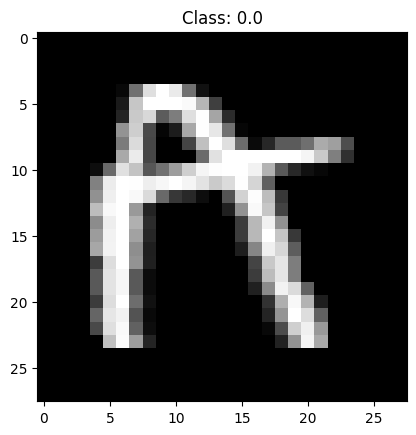

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])

plt.imshow(alphabet_data[index], cmap='gray')

plt.title('Class: ' + str(alphabet_labels[index]))

9.Menggunakan sns.countplot() untuk memvisualisasikan distribusi label dalam dataset menggunakan sumbu x yang merupakan 'Labels' dari df_az_labels

<Axes: xlabel='Labels', ylabel='count'>

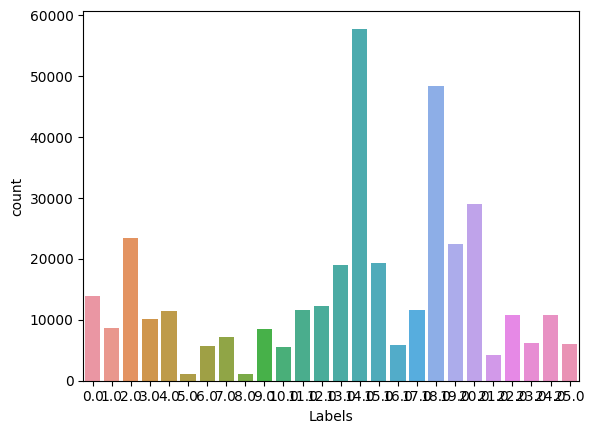

In [21]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})

# Menggunakan seaborn untuk membuat plot countplot dengan sumbu x adalah 'Labels' dari df_az_labels
sns.countplot(df_az_labels, x='Labels')

#Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Memeriksa nilai unik dari digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Memeriksa nilai unik dari alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
alphabet_labels += 10

In [25]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them
# Menggabungkan dua array, alphabet_data dan digits_data, secara vertikal menggunakan np.vstack()
data = np.vstack([alphabet_data, digits_data])

# Menggabungkan dua array, alphabet_labels dan digits_labels, secara horizontal menggunakan np.hstack()
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

#Preprocessing

In [31]:
# Normalize data
data /= 255.0

In [32]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

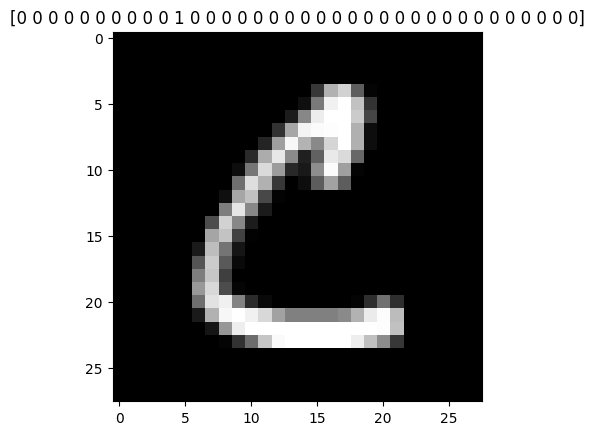

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max()

57825

In [38]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

Hasil yang dihasilkan dari Preprocessing adalah sebagai berikut:

-Normalisasi data akan menghasilkan rentang nilai antara 0 dan 1.

-Encoding label menggunakan label binarizer akan menghasilkan representasi biner untuk setiap label, dengan bentuk (jumlah sampel, jumlah kelas).

-Gambar yang ditampilkan akan menunjukkan gambar dari data dengan label biner yang sesuai.

-Bobot untuk setiap label akan digunakan untuk menangani ketidakseimbangan data. Bobot ini memberikan penekanan lebih pada data yang lebih sedikit sehingga model dapat mempelajari dengan baik dari data yang kurang representatif.

Dengan demikian, hasil yang dihasilkan adalah normalisasi data, encoding label dengan label binarizer, dan bobot untuk menangani ketidakseimbangan data

In [39]:
# Memisahkan data dan label menjadi data latih dan data uji menggunakan train_test_split
# Proporsi data uji adalah 0.2 (20%)
# Nilai random_state digunakan untuk menghasilkan pembagian yang sama setiap kali kode dijalankan
# Stratify = labels digunakan untuk memastikan distribusi kelas yang seimbang antara data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

#Create Data Augmentation

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# Membuat objek augmentation menggunakan kelas ImageDataGenerator
# rotation_range = 10 mengatur rentang rotasi gambar antara -10 dan +10 derajat
# zoom_range = 0.05 mengatur rentang perbesaran gambar antara 0.95 dan 1.05 kali ukuran aslinya
# width_shift_range = 0.1 mengatur rentang pergeseran lebar gambar sebesar 0.1 kali lebar aslinya
# height_shift_range = 0.1 mengatur rentang pergeseran tinggi gambar sebesar 0.1 kali tinggi aslinya
# horizontal_flip = False mengatur untuk tidak melakukan flipping horizontal pada gambar
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip=False)

#Build CNN Model

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Build the network
# Membuat objek model jaringan saraf menggunakan kelas Sequential
network = Sequential()

# Menambahkan layer Conv2D sebagai layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input_shape (28, 28, 1)
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Menambahkan layer MaxPool2D sebagai layer pooling dengan ukuran pool_size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer Conv2D kedua dengan 64 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'same'
network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# Menambahkan layer MaxPool2D kedua dengan ukuran pool_size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer Conv2D ketiga dengan 128 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'valid'
network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))

# Menambahkan layer MaxPool2D ketiga dengan ukuran pool_size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer Flatten untuk meratakan output menjadi vektor
network.add(Flatten())

# Menambahkan layer Dense (fully connected) dengan 64 unit dan fungsi aktivasi ReLU
network.add(Dense(64, activation='relu'))

# Menambahkan layer Dense kedua dengan 128 unit dan fungsi aktivasi ReLU
network.add(Dense(128, activation='relu'))

# Menambahkan layer Dense terakhir dengan 36 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan menggunakan categorical_crossentropy sebagai loss function, adam sebagai optimizer, dan metrik akurasi
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [48]:
# Fit the model
# Melatih model jaringan saraf menggunakan metode fit
# augmentation.flow(X_train, y_train, batch_size=batch_size) menghasilkan generator data augmentasi untuk latihan
# X_train dan y_train adalah data latih dan label latih
# batch_size adalah ukuran batch yang digunakan dalam pelatihan
# validation_data=(X_test, y_test) adalah data validasi yang digunakan selama pelatihan
# steps_per_epoch adalah jumlah langkah per epoch yang dihitung berdasarkan panjang data latih dan ukuran batch
# epochs adalah jumlah epoch (iterasi) dalam pelatihan
# class_weight adalah bobot kelas yang digunakan dalam perhitungan loss function
# verbose=1 digunakan untuk menampilkan informasi pelatihan secara terperinci
# callbacks=[checkpointer] digunakan untuk menggunakan callback checkpointer yang telah didefinisikan sebelumnya
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data=(X_test, y_test),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=epochs,
                      class_weight=classes_weights,
                      verbose=1,
                      callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1756 - accuracy: 0.8250
Epoch 1: val_loss improved from inf to 0.29738, saving model to custom_ocr.model
2765/2765 [==============================] - 546s 197ms/step - loss: 2.1756 - accuracy: 0.8250 - val_loss: 0.2974 - val_accuracy: 0.8733
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9716 - accuracy: 0.9020
Epoch 2: val_loss improved from 0.29738 to 0.22433, saving model to custom_ocr.model
2765/2765 [==============================] - 526s 190ms/step - loss: 0.9716 - accuracy: 0.9020 - val_loss: 0.2243 - val_accuracy: 0.9092
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8237 - accuracy: 0.9120
Epoch 3: val_loss improved from 0.22433 to 0.20722, saving model to custom_ocr.model
2765/2765 [==============================] - 530s 192ms/step - loss: 0.8237 - accuracy: 0.9120 - val_loss: 0.2072 - val_accuracy: 0.9148
Epoch 4/20
2765/2765 [======================

KeyboardInterrupt: ignored

#Evaluate Model

Make a Single Prediction

In [49]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 29s 41ms/step


In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([1.6209123e-13, 2.2861266e-10, 5.5486304e-10, 6.6957728e-10,
       3.8329034e-14, 9.1456315e-10, 8.8449069e-15, 1.8077370e-10,
       1.4038381e-12, 3.6771450e-16, 8.5698064e-14, 2.0768692e-11,
       1.0425104e-11, 1.5889096e-09, 1.6612253e-10, 1.9221287e-10,
       4.6900199e-11, 3.6554770e-11, 9.9992925e-01, 7.0394068e-05,
       1.9292939e-11, 2.9754916e-09, 4.6894580e-14, 8.0889489e-13,
       3.3591259e-12, 3.7106572e-14, 2.9535114e-14, 4.7403009e-15,
       2.7675381e-10, 2.8546475e-07, 7.3841736e-13, 1.2483403e-15,
       1.2432031e-15, 1.6009448e-08, 1.0585210e-12, 5.0005866e-09],
      dtype=float32)

In [51]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [52]:
# Check label for 24
name_labels[18]

'I'

In [53]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1])

18

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

Make an Evaluation on Test Data

In [56]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 39s 14ms/step - loss: 0.2121 - accuracy: 0.9100


[0.2121494561433792, 0.9100350141525269]

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.19      0.92      0.31      1381
           1       0.97      0.99      0.98      1575
           2       0.91      0.97      0.94      1398
           3       0.97      0.99      0.98      1428
           4       0.91      0.97      0.94      1365
           5       0.64      0.94      0.76      1263
           6       0.93      0.98      0.96      1375
           7       0.93      0.99      0.96      1459
           8       0.95      0.99      0.97      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.97      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.94      0.95      0.95      2027
           E       0.99      0.98      0.99      2288
           F       0.97      1.00      0.98       233
           G       0.94      0.95      0.95      1152
           H       0.98    

In [59]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

NameError: ignored

In [60]:
# You can also check the another metrics
history.history.keys()

NameError: ignored

In [61]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

NameError: ignored

In [62]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
# Import library
from tensorflow.keras.models import load_model

In [64]:
# Load saved network
load_network = load_model('network')

In [65]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [67]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

AttributeError: ignored

In [68]:
# Check shape
img.shape

AttributeError: ignored

In [69]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

error: ignored

In [70]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

NameError: ignored

In [71]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

NameError: ignored

In [72]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

NameError: ignored

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

In [74]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

NameError: ignored

In [75]:
# check label for 6
name_labels[6]

'6'

####Kesimpulan


Model CNN yang telah dilatih menggunakan data MNIST dan Kaggle A-Z menunjukkan kemampuan yang baik dalam mengklasifikasikan gambar huruf. Dalam contoh spesifik, model berhasil mengenali gambar huruf "b" yang diubah ukurannya sebagai huruf "G" dengan label prediksi 6. Hal ini menunjukkan bahwa model CNN dapat menangkap pola-pola penting dalam data latih dan dapat diterapkan untuk mengklasifikasikan gambar yang belum pernah dilihat sebelumnya.

Meskipun hasilnya cukup akurat, evaluasi lebih lanjut diperlukan dengan menguji model pada dataset yang lebih besar dan beragam. Metrik evaluasi seperti akurasi, presisi, dan recall dapat memberikan pemahaman yang lebih komprehensif tentang performa model. Oleh karena itu, saran untuk pengujian lebih luas dan evaluasi mendalam diberikan untuk membuat kesimpulan yang lebih akurat dan terpercaya mengenai kemampuan model CNN ini